In [279]:
##ALL OF THE IMPORTS AND SUCH

from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import math
from numpy import genfromtxt
import colorcet as cc
import random
import aotools
import itertools

import numpy as np
import scipy as sp

plt.style.use('dark_background')

In [280]:
#Generate Colormap Intensity
cmap = np.zeros([256, 4])
cmap[:, 3] = np.linspace(0, 1, 256)
cmap[:, 0]= np.linspace(0, 0, 256)
cmap[:, 1]= np.linspace(0, 0, 256)
cmap[:, 2]= np.linspace(0, 0, 256)
#Intensity colours
imap = matplotlib.colors.ListedColormap(cmap)
#Phase colours
pmap= cc.m_CET_C6

In [ ]:
#Generate Phase colormap
import pylab as pl
import numpy as np

a = np.array([[0,1]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap=pmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.1, 1.2, 2])
pl.colorbar(orientation="horizontal", cax=cax, ticks=[])
pl.savefig("colorbar.png")

In [342]:
#Constants
pi=3.141592653
wavelength = 785*nm
#Beam Params
size = 30*cm
w0=5*cm
N =256
#Propagataion Params
z=5400
r0=0.1
scint=0.5

In [348]:
##These are custom functions for plotting the LightPipes beams with Phase and Intensity on the same plot, alternatively just the Intensity or just the Phase.

def plotbeam(F):
    I=1-Intensity(1,F)
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=np.min(I),vmax=np.max(I))
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()

def plotint(F,norm=1):
    F=Normal(F)
    if norm==1:
        I=Intensity(1,F)
    else:
        I=Intensity(0,F)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(I,cmap='grey',vmin=0,vmax=norm)
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()
    return I

def plotphase(F):
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')

    plt.tight_layout()

def savebeam(F,name='unnamed',norm=1):
    F=Normal(F)
    if norm==1:
        I=1-Intensity(1,F)
    else:
        I=norm-Intensity(0,F)
    Phi=np.mod(Phase(F),2*pi)

    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot()
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=0,vmax=norm)
    ax1.axis("off")
        
    plt.savefig(name+'.png', bbox_inches=0)
    plt.close("all")

In [284]:
#This is a function for making OAM beams, 

def OAM(state: int=0 ,phase=0):
    F=Begin(size,wavelength,N)

    if(state==0):
        F=GaussBeam(F, w0)
    else:
        F=GaussBeam(F, w0, doughnut=True, n=0,m=state)

    F=SubPhase(F,Phase(F)+phase)

    return F

In [336]:
#These are some functions for making fancy beams, for now, lets not think about them but lets keep them.

def MUBphases(d,MUB):
    phi,p=[],[]
    for state in range(d):
        for j in range(d):
            p.append(((2*np.pi/d)*(MUB*(j**2)+state*j)))
        phi.append(p)
        p=[]
    return phi

# Generate mode list
def ell(d):
    if d%2 == 0:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d+1,dtype=int)
        l=l[l != 0]
    else:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d,dtype=int)
    return l

#Mix many beams
def MixManyBeams(beams):
    if len(beams) > 1:
        beams[1]=BeamMix(beams[0],beams[1])
        beams.pop(0)
        MixManyBeams(beams)
    return beams[0]

#Arbitrary ANG in dimension d
def ANG(d,state):
    intensityNorm=[1,1,187.3568368182197,302.7415771427128,281.4774347094998,342.95046333063704,1,330.2491174614896,276.25225696328897]
    Q,p=[],[]
    l=ell(d)
    
    for i in range(d):
        p.append((2*np.pi/d)*i*state)

    for i in range(d):
        Q.append(OAM(l[i],p[i]))

    F=MixManyBeams(Q)
    return [F,intensityNorm[d]]

#Arbitrary MUB in d dimensions {2,3,4,5,7,8}
def ArbMUB(d,MUB,state):
    intensityNorm=[1,1,187.3568368182197,302.7415771427128,281.4774347094998,342.95046333063704,1,330.2491174614896,276.25225696328897]
    Q,p=[],[]
    l=ell(d)
    if d==2:
        p=[[[0,0],[0,np.pi]],[[0,np.pi/2],[0,3*np.pi/2]]][MUB][state]
    
    elif d==4:
        p=[[[0,0,0,0],[0,np.pi,np.pi,0],[0,0,np.pi,np.pi],[0,np.pi,0,np.pi]],[[0,np.pi/2,np.pi/2,np.pi],[0,3*np.pi/2,3*np.pi/2,np.pi],[0,np.pi/2,3*np.pi/2,0],[0,3*np.pi/2,np.pi/2,0]],[[0,0,3*np.pi/2,np.pi/2],[0,np.pi,np.pi/2,np.pi/2],[0,0,np.pi/2,3*np.pi/2],[0,np.pi,3*np.pi/2,3*np.pi/2]],[[0,3*np.pi/2,0,np.pi/2],[0,np.pi/2,np.pi,np.pi/2],[0,np.pi/2,0,3*np.pi/2],[0,3*np.pi/2,np.pi,3*np.pi/2]]][MUB][state]

    elif d==8:
        p=[[[0,0,0,0,0,0,0,0],[0,1.570796327,1.570796327,3.141592654,1.570796327,3.141592654,3.141592654,-1.570796327],[0,1.570796327,0,1.570796327,0,-1.570796327,3.141592654,1.570796327],[0,0,1.570796327,1.570796327,1.570796327,-1.570796327,0,3.141592654],[0,0,1.570796327,-1.570796327,0,3.141592654,1.570796327,1.570796327],[0,1.570796327,0,-1.570796327,1.570796327,0,1.570796327,3.141592654],[0,1.570796327,1.570796327,0,0,1.570796327,-1.570796327,3.141592654],[0,0,0,3.141592654,1.570796327,1.570796327,-1.570796327,1.570796327]],[[0,3.141592654,0,3.141592654,0,3.141592654,0,3.141592654],[0,-1.570796327,1.570796327,0,1.570796327,0,3.141592654,1.570796327],[0,-1.570796327,0,-1.570796327,0,1.570796327,3.141592654,-1.570796327],[0,3.141592654,1.570796327,-1.570796327,1.570796327,1.570796327,0,0],[0,3.141592654,1.570796327,1.570796327,0,0,1.570796327,-1.570796327],[0,-1.570796327,0,1.570796327,1.570796327,3.141592654,1.570796327,0],[0,-1.570796327,1.570796327,3.141592654,0,-1.570796327,-1.570796327,0],[0,3.141592654,0,0,1.570796327,-1.570796327,-1.570796327,-1.570796327]],[[0,0,3.141592654,3.141592654,0,0,3.141592654,3.141592654],[0,1.570796327,-1.570796327,0,1.570796327,3.141592654,0,1.570796327],[0,1.570796327,3.141592654,-1.570796327,0,-1.570796327,0,-1.570796327],[0,0,-1.570796327,-1.570796327,1.570796327,-1.570796327,3.141592654,0],[0,0,-1.570796327,1.570796327,0,3.141592654,-1.570796327,-1.570796327],[0,1.570796327,3.141592654,1.570796327,1.570796327,0,-1.570796327,0],[0,1.570796327,-1.570796327,3.141592654,0,1.570796327,1.570796327,0],[0,0,3.141592654,0,1.570796327,1.570796327,1.570796327,-1.570796327]],[[0,3.141592654,3.141592654,0,0,3.141592654,3.141592654,0],[0,-1.570796327,-1.570796327,3.141592654,1.570796327,0,0,-1.570796327],[0,-1.570796327,3.141592654,1.570796327,0,1.570796327,0,1.570796327],[0,3.141592654,-1.570796327,1.570796327,1.570796327,1.570796327,3.141592654,3.141592654],[0,3.141592654,-1.570796327,-1.570796327,0,0,-1.570796327,1.570796327],[0,-1.570796327,3.141592654,-1.570796327,1.570796327,3.141592654,-1.570796327,3.141592654],[0,-1.570796327,-1.570796327,0,0,-1.570796327,1.570796327,3.141592654],[0,3.141592654,3.141592654,3.141592654,1.570796327,-1.570796327,1.570796327,1.570796327]],[[0,0,0,0,3.141592654,3.141592654,3.141592654,3.141592654],[0,1.570796327,1.570796327,3.141592654,-1.570796327,0,0,1.570796327],[0,1.570796327,0,1.570796327,3.141592654,1.570796327,0,-1.570796327],[0,0,1.570796327,1.570796327,-1.570796327,1.570796327,3.141592654,0],[0,0,1.570796327,-1.570796327,3.141592654,0,-1.570796327,-1.570796327],[0,1.570796327,0,-1.570796327,-1.570796327,3.141592654,-1.570796327,0],[0,1.570796327,1.570796327,0,3.141592654,-1.570796327,1.570796327,0],[0,0,0,3.141592654,-1.570796327,-1.570796327,1.570796327,-1.570796327]],[[0,3.141592654,0,3.141592654,3.141592654,0,3.141592654,0],[0,-1.570796327,1.570796327,0,-1.570796327,3.141592654,0,-1.570796327],[0,-1.570796327,0,-1.570796327,3.141592654,-1.570796327,0,1.570796327],[0,3.141592654,1.570796327,-1.570796327,-1.570796327,-1.570796327,3.141592654,3.141592654],[0,3.141592654,1.570796327,1.570796327,3.141592654,3.141592654,-1.570796327,1.570796327],[0,-1.570796327,0,1.570796327,-1.570796327,0,-1.570796327,3.141592654],[0,-1.570796327,1.570796327,3.141592654,3.141592654,1.570796327,1.570796327,3.141592654],[0,3.141592654,0,0,-1.570796327,1.570796327,1.570796327,1.570796327]],[[0,0,3.141592654,3.141592654,3.141592654,3.141592654,0,0],[0,1.570796327,-1.570796327,0,-1.570796327,0,3.141592654,-1.570796327],[0,1.570796327,3.141592654,-1.570796327,3.141592654,1.570796327,3.141592654,1.570796327],[0,0,-1.570796327,-1.570796327,-1.570796327,1.570796327,0,3.141592654],[0,0,-1.570796327,1.570796327,3.141592654,0,1.570796327,1.570796327],[0,1.570796327,3.141592654,1.570796327,-1.570796327,3.141592654,1.570796327,3.141592654],[0,1.570796327,-1.570796327,3.141592654,3.141592654,-1.570796327,-1.570796327,3.141592654],[0,0,3.141592654,0,-1.570796327,-1.570796327,-1.570796327,1.570796327]],[[0,3.141592654,3.141592654,0,3.141592654,0,0,3.141592654],[0,-1.570796327,-1.570796327,3.141592654,-1.570796327,3.141592654,3.141592654,1.570796327],[0,-1.570796327,3.141592654,1.570796327,3.141592654,-1.570796327,3.141592654,-1.570796327],[0,3.141592654,-1.570796327,1.570796327,-1.570796327,-1.570796327,0,0],[0,3.141592654,-1.570796327,-1.570796327,3.141592654,3.141592654,1.570796327,-1.570796327],[0,-1.570796327,3.141592654,-1.570796327,-1.570796327,0,1.570796327,0],[0,-1.570796327,-1.570796327,0,3.141592654,1.570796327,-1.570796327,0],[0,3.141592654,3.141592654,3.141592654,-1.570796327,1.570796327,-1.570796327,-1.570796327]]][MUB][state]

    else:
        for j in range(d):
            p.append(((2*np.pi/d)*(MUB*(j**2)+state*j)))
            
    for i in range(d):
        Q.append(OAM(l[i],p[i]))

    F=MixManyBeams(Q)
    
    return [F,intensityNorm[d]]
    

In [ ]:
plotbeam(OAM(-1))
[1,0]
plotbeam(OAM(1))
[0,1]
plotbeam(BeamMix(OAM(-1),OAM(1)))
1/sqrt(2)*([1,0]+[0,1])
plotbeam(BeamMix(OAM(-1),OAM(1,np.pi)))
1/sqrt(2)*([1,0]-[0,1])
plotbeam(BeamMix(OAM(-1),OAM(1,np.pi/2)))
1/sqrt(2)*([1,0]+1j*[0,1])
plotbeam(BeamMix(OAM(-1),OAM(1,3*np.pi/2)))
1/sqrt(2)*([1,0]-1j*[0,1])

In [ ]:
#Check maximum intensity in the sets of mubs for intensity normalization. Must be redone when changing resolution
'''l,L=[],[]
for d in [2,3,4,5,7,8]:
    for i in range(d):
        el=ell(d)
        l.append(np.max(Intensity(0,Normal(OAM(el[i])[0]))))
    L.append(np.max(l))
print(L)'''

In [ ]:
#Generate and Save plots of all OAM Modes
'''d=9
l=ell(d)
for mode in range(d):
    beam=OAM(l[mode]) 
    savebeam(beam,'OAMl'+str(l[mode]))
    print(d,l[mode])'''

In [ ]:
#Generate and Save plots of all ANG Modes
'''for d in [2,3,4,5,6,7,8]:
    for mode in range(d):
        beam=ANG(d,mode) 
        savebeam(beam[0],'ANG'+str(d)+'Phi'+str(mode),beam[1])
        print(d,mode)'''

In [340]:
MUBphases(4,1)

[[0.0, 1.5707963267948966, 6.283185307179586, 14.137166941154069],
 [0.0, 3.141592653589793, 9.42477796076938, 18.84955592153876],
 [0.0, 4.71238898038469, 12.566370614359172, 23.561944901923447],
 [0.0, 6.283185307179586, 15.707963267948966, 28.274333882308138]]

In [286]:
plt.close("all")

In [362]:
# This is the attempt at doing the overlap integral 

def overlapInt(F,G):
    F,G=Normal(F),Normal(G)
    intensityArr=np.multiply(np.sqrt(Intensity(1,F)),np.sqrt(Intensity(1,G)))
    phaseArr=np.exp(1j*(np.mod(np.pi+Phase(F,blank_eps=0.8),np.pi*2)-(np.mod(np.pi+Phase(G,blank_eps=0.8),np.pi*2))))
    fieldArr=np.multiply(intensityArr,phaseArr)
    
    """fieldArr=np.multiply(np.conjugate(G.field),F.field)"""
    summed=np.nansum(np.nansum(fieldArr))
    return abs(summed)
    return(fieldArr)
    

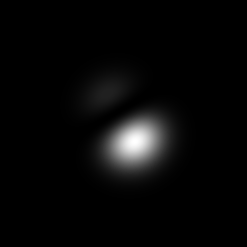

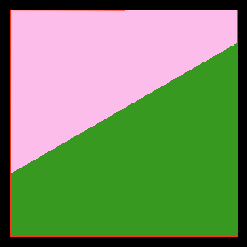

In [349]:
plotint(ArbMUB(3,0,1)[0])
plotphase(ArbMUB(3,0,1)[0])

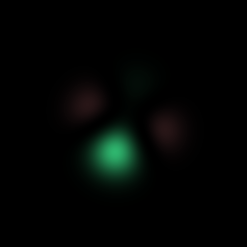

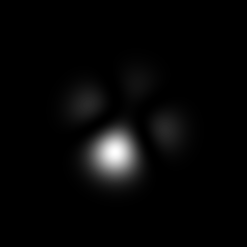

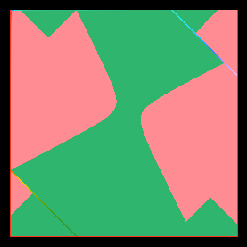

In [351]:
plotbeam(ArbMUB(5,0,1)[0])
plotint(ArbMUB(5,0,1)[0])
plotphase(ArbMUB(5,0,1)[0])

In [371]:
d=6
l=ell(d)
for j in range(d):
    for i in range(d):
        test=overlapInt(OAM(l[j]),ANG(d,i)[0])
        print(test)

187.47972980840893
189.9879898283658
197.40927889360844
398.40410613837565
197.4091678766088
189.98794343914847
240.02648346990694
239.69820998940966
232.65083344904522
417.2004322922373
232.6508495304737
239.6981859489975
50.14880758161326
48.3849764907888
42.17288719319712
40.23495603754482
42.172887520284455
48.38497355567508
50.14880758161329
48.384973555675124
42.172887520284476
40.23495603754485


KeyboardInterrupt: 

In [ ]:
test=OAM(0).field
plotbeam(OAM(0))

In [370]:
d=8
l=ell(d)
over=[]
overlap=[]
for j in range(d):
    over=[]
    for i in range(d):
        over.append(overlapInt(OAM(l[j]),ANG(d,i)[0]))
    overlap.append(over/sum(over))
print(overlap)
im = plt.imshow(overlap, interpolation='none', cmap='viridis', vmax=1, vmin=0)

plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_19136\474148907.py:9: RuntimeWarning: invalid value encountered in divide
  overlap.append(over/sum(over))


KeyboardInterrupt: 

Below here is Attempts to begin doing simulations

In [ ]:
#Constants
pi=3.141592653

#Settings for the Beam

#Let us go with 785 nm for the wavelength
wavelength = 785*nm

# This is the size of the window we are generating, Our reciever is 30 cm diameter so I figured 30 cm is good
size = 30*cm

#This is the beam waist, I do not know if this is radius or if this is diameter, this would be good to check!
#I am suspecting it is radius for some reason?
w0=3*cm

#PropogationDistance
z=5400

#Resolution, keep low for doing rough work, but when we make nice plots we need to crank it up
N = 250

#This will be the average Fried parameter that we want to simulate
r0=0.1
#This will be the "Scintillation index" Sigma_Chi^2 in the textbook I sent over. I don't know what normal values for this are.
scint=0.5

In [ ]:
F=Begin(size,wavelength,N)
F=GaussBeam(F, w0, LG=True, n=0,m=2)

plotbeam(F)

In [ ]:
l=2

F=OAM(l)
plotbeam(F)
F=OAM(-l)
plotbeam(F)
F=BeamMix(OAM(l),OAM(-l))
plotbeam(F)

In [ ]:
#### My understanding is that "Donut" is just the way that the Lightpipes refers to beams with OAM.
F=OAM(0)
plotint(F)
plotphase(F)

In [ ]:
# This is an example of generating a single turbulence screen with the AOtools library.  I do not claim to fully understand what the last two inputs are,
# I am pretty sure I got those values from the internet though and they should be good.

phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001)

In [ ]:
#I don't know if this one, or the next one is better. There is something interesting going on where the boundaries are
# reflective, so in propagation stuff looks funny
beam=OAM(0)
for i in range(10):
    phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(10000,N,size/N,100,0.001)
    beam=SubPhase(beam,Phase(beam)+phase)
    beam=Fresnel(beam,500)
    plotphase(beam)
    plotint(beam)
plotbeam(beam)

In [ ]:
F=OAM(0)
for i in range(n):
    phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,1*mm)

    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.mod(phase+np.min(phase),2*pi),cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    print(np.max(Intensity(F)))
    F=SubPhase(F,Phase(F)+phase)
    F=Fresnel(F,z/n)

    plotbeam(F)


